In [75]:
#find snps
#import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


root  = "/Users/k23030440/S.-Pombe-MLPs - most recent/"
import numpy as np
import scipy.stats as st
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [242]:
#load Marias data /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rodriguez-Lopez 2023 deletion library/SupplementaryFile1.xlsx
data = pd.read_excel(root + 'external data/Rodriguez-Lopez 2023 deletion library/SupplementaryFile1.xlsx', sheet_name='All conditions')

#remove rows where more than 20% of the data is missing
data = data.dropna(thresh=0.2*data.shape[1], axis=0)
#reset index
data = data.reset_index(drop=True)
data.shape

(3450, 130)

In [77]:
array = []
#calculate l1 distances between each row and srb11
#find index of srb11
srb11 = data[data['gene_id'] == 'SPBC12D12.06'].index
med13 = data[data['gene_id'] == 'SPAC589.02c'].index

#calculate l1 distance between each row and srb11
for i in data.index:
    if i != srb11:
      gene = data.loc[i,'gene_id']
      subset = data[(data['gene_id'] == gene ) | (data['gene_id'] == 'SPBC12D12.06')]
      #remove nanas
      subset = subset.dropna(axis=1)
      #remove first two cols
      subset = subset.iloc[:,2:]
      array.append(np.linalg.norm(subset.iloc[0,:] - subset.iloc[1,:], ord=1))
#create subset with med13 and srb11 and find l1 distance
subset = data[(data['gene_id'] == 'SPAC589.02c' ) | (data['gene_id'] == 'SPBC12D12.06')]
#remove nanas
subset = subset.dropna(axis=1)
l1_med13= np.linalg.norm(subset.iloc[0,2:] - subset.iloc[1,2:], ord=1)


In [78]:
#show gene names with ess than 60 in l1 distance
#data remove srb11
data = data[data['gene_id'] != 'SPBC12D12.06']
#reset
data = data.reset_index(drop=True)
data['l1_distance'] = array
data[data['l1_distance'] < 60]['gene_id']

238     SPAC1486.02c
3431     SPBC577.15c
Name: gene_id, dtype: object

In [213]:
#sort data by l1_distance
top10_genes = data.sort_values(by=['l1_distance']).head(10)["gene_id"].values
top1000_genes = data.sort_values(by=['l1_distance']).head(1000)["gene_id"].values
#read in map /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv
map = pd.read_csv(root + 'external data/Pombase files/gene_IDs_names_products.tsv', sep='\t', header=None)
#find top10_genes in column 0 and return 2
top10_genes = map[map[0].isin(top10_genes)][2].values
top1000_genes = map[map[0].isin(top1000_genes)][2].values
top10_genes

array(['caa1', 'dsc2', 'vps66', 'mug8', 'did4', 'ace2', 'ubr1', 'sim3',
       'kgd2', 'cbf11'], dtype=object)

In [80]:
#find which percentile l1_med13 is at in array
percentile = st.percentileofscore(array, l1_med13)

In [81]:
#calculate ecdf of l1 distances
#sort array to sorted_array
sorted_array = np.sort(array)
ecdf = np.arange(1, len(array)+1) / len(array)


In [82]:
sorted_array

array([ 53.,  57.,  64., ..., 146., 146., 152.])

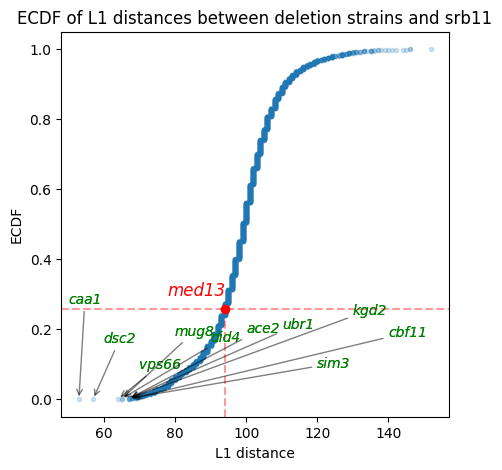

In [83]:
#create matlibplot figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(sorted_array, ecdf, marker='.', linestyle='none',alpha=0.2)
ax.set_xlabel('L1 distance')
ax.set_ylabel('ECDF')
ax.set_title('ECDF of L1 distances between deletion strains and srb11')
#vline at l1_med13 x and y is percentile/100
ax.axvline(x=l1_med13, ymin=0, ymax=percentile/100, color='red', linestyle='--',alpha=0.4)
ax.axhline(y=percentile/100, xmin=0, xmax=l1_med13, color='red', linestyle='--',alpha=0.4)
#text saying med13
ax.text(l1_med13-16,percentile/100+0.04, 'med13', color='red', fontsize=12, style='italic')
#mark it with a dot
ax.plot(l1_med13,percentile/100, marker='o', color='red', linestyle='none')
#print names of top 10 genes and connect lines
for i in range(len(top10_genes)):
    text_x = 50+i*10
    text_y = ecdf[i]+np.random.uniform(0.3,0.08)
    ax.annotate(top10_genes[i], (sorted_array[i], ecdf[i]), xytext=(text_x,text_y ), arrowprops=dict(arrowstyle="->", color='black',alpha = 0.5), color='green', fontsize=10, style='italic')
    #print text again without arrow
    ax.text(text_x,text_y, top10_genes[i], color='green', fontsize=10, style='italic')
fig.savefig(root + 'Figures/All figures/l1_distance_ecdf.svg', format='svg',dpi=400)
fig.savefig(root + 'Figures/All figures/l1_distance_ecdf.png', format='png',dpi=400)

In [222]:

#/Users/k23030440/S.-Pombe-MLPs - most recent/Bence folder/Bioneer screen/final_results_screen.csv

file_path = "/Users/k23030440/S.-Pombe-MLPs - most recent/Bence folder/Bioneer screen/final_results_screen.csv"
df = pd.read_csv(file_path)

# Now you can work with the loaded dataframe 'df'

strain_array = np.array(df['strain'])
strain_name=map[map[2].isin(strain_array)][2].values
strain_systematic=map[map[2].isin(strain_array)][0].values
#add SPAC607.02c
strain_systematic = np.append(strain_systematic, 'SPAC607.02c')
#turn this back to strain_common_name
strain_common_name =np.append(strain_name, 'SPAC607.02c')
#sort data by l1_distance
all_genes_ordered = data.sort_values(by=['l1_distance'])["gene_id"].values
#read in map /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv

#all_genes_ordered  = map[map[0].isin(all_genes_ordered )][2].values
mapped_genes = [map[map[0] == gene][2].values[0] for gene in all_genes_ordered if len(map[map[0] == gene][2].values) > 0]
strain_indices= np.where(np.isin(mapped_genes, strain_name))


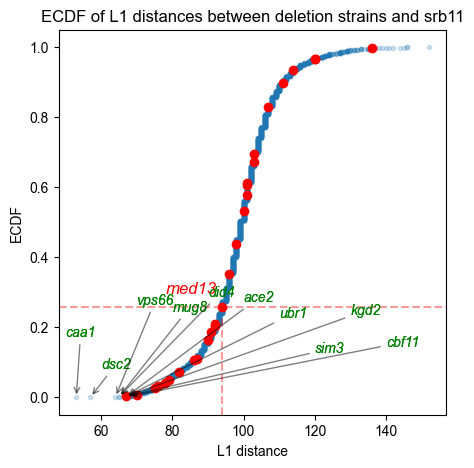

In [223]:
#create matlibplot figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(sorted_array, ecdf, marker='.', linestyle='none',alpha=0.2)
ax.set_xlabel('L1 distance')
ax.set_ylabel('ECDF')
ax.set_title('ECDF of L1 distances between deletion strains and srb11')
#vline at l1_med13 x and y is percentile/100
ax.axvline(x=l1_med13, ymin=0, ymax=percentile/100, color='red', linestyle='--',alpha=0.4)
ax.axhline(y=percentile/100, xmin=0, xmax=l1_med13, color='red', linestyle='--',alpha=0.4)
#text saying med13
ax.text(l1_med13-16,percentile/100+0.04, 'med13', color='red', fontsize=12, style='italic')
#mark it with a dot
ax.plot(l1_med13,percentile/100, marker='o', color='red', linestyle='none')
#print names of top 10 genes and connect lines
for i in range(len(top10_genes)):
    text_x = 50+i*10
    text_y = ecdf[i]+np.random.uniform(0.3,0.08)
    ax.annotate(top10_genes[i], (sorted_array[i], ecdf[i]), xytext=(text_x,text_y ), arrowprops=dict(arrowstyle="->", color='black',alpha = 0.5), color='green', fontsize=10, style='italic')
    #print text again without arrow
    ax.text(text_x,text_y, top10_genes[i], color='green', fontsize=10, style='italic')


# Highlight strains in strain_array
for s in strain_indices:
    ax.plot(sorted_array[s], ecdf[s], marker='o', color='red', linestyle='none')

In [224]:
# a better way to show the hits would be to see whether they are part of any of the major clusters reported in the paper
clusters= pd.read_excel(root + 'external data/Rodriguez-Lopez 2023 deletion library/SupplementaryFile1.xlsx', sheet_name='K-medoids clusters')
#only keep first 8 cols and rename to 1-8
clusters = clusters.iloc[:,:8]
clusters.columns = range(1,9)
#for each entry in strain_systematic, find which cluster it is in
cluster_indices = []
for strain in strain_systematic:
    for i in range(1,9):
        if strain in clusters[i].values:
            cluster_indices.append(i)
            break
#to np array that is int
cluster_indices = np.array(cluster_indices).astype(int)

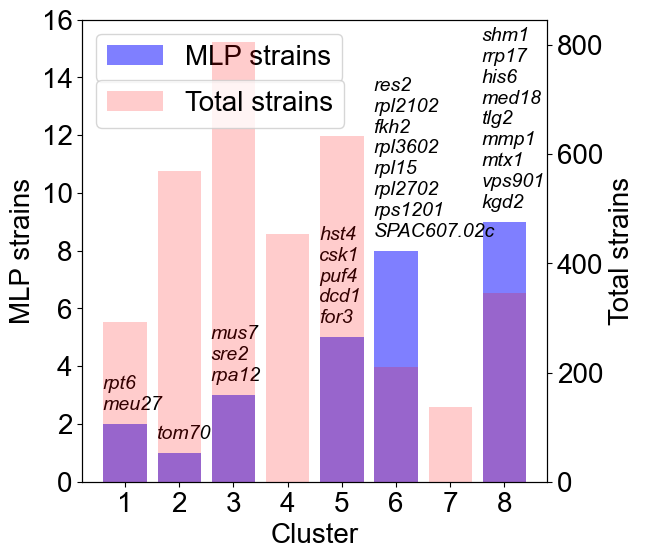

In [240]:
#use arial
plt.rcParams['font.family'] = 'Arial'
#create a barplot of the clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(range(1,9), [cluster_indices.tolist().count(i) for i in range(1,9)], alpha=0.5, color='blue')
#write above each bar the names of strains from strain_systematic that are in that cluster
for i in range(1,9):
    ax.text(i-0.42,cluster_indices.tolist().count(i)+0.5, '\n'.join([strain_common_name[j] for j in np.where(cluster_indices == i)[0]]), color='black', fontsize=14, style='italic')

ax.set_xlabel('Cluster')
#overlay a barplot of cluster sizes
ax2 = ax.twinx()
#this should be in the background
ax2.bar(range(1,9), [len(clusters[i].dropna()) for i in range(1,9)], alpha=0.2, color='red')
#ylim to 13
ax.set_ylim(0,16)

#make larger ticks and labels
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(range(1,9))
#larger ax2 ticks
ax2.tick_params(axis='both', which='major', labelsize=20)
#larger labels
ax.set_xlabel('Cluster', fontsize=20)
ax.set_ylabel('MLP strains', fontsize=20)
ax2.set_ylabel('Total strains', fontsize=20)

#legend
ax.legend(['MLP strains'], loc='upper left', fontsize=20)
#upper left but below
ax2.legend(['Total strains'], loc='upper left', fontsize=20, bbox_to_anchor=(0, 0.9))
#save 
fig.savefig(root + 'Figures/All figures/cluster_barplot.svg', format='svg',dpi=400)
fig.savefig(root + 'Figures/All figures/cluster_barplot.png', format='png',dpi=400)


In [88]:
sorted_array[strain_index]


array([], dtype=float64)

In [204]:
top100_genes

array(['caa1', 'csm1', 'idh1', 'cox4', 'tah18', 'cid14', 'toe1', 'arb2',
       'gar2', 'dsc2', 'coa2', 'saf5', 'mrpl1', 'vps66', 'pex19', 'ilv3',
       nan, 'tam6', 'sno1', 'ogm1', 'kri1', 'ura1', 'php3', 'swd1',
       'dia4', 'zip1', 'his1', nan, 'sec67', 'pom1', 'kti12', 'dml1',
       'hus5', 'mtq2', 'mug8', 'lys2', 'cul4', 'his6', 'pik3', 'rad31',
       'did4', 'mtf2', 'rad51', 'ace2', 'alg3', nan, 'eme1', 'agl1',
       'rav1', 'uap1', 'trx2', 'atp16', 'bot1', 'ade8', 'imp1', 'ppr7',
       'zrt1', 'erp5', 'srp40', 'his2', 'aim22', 'rpl1102', nan, nan,
       'wbp4', 'ubr1', 'psg1', 'rga7', 'mag2', 'cox17', 'pha2', 'tdh1',
       'alg6', 'pmt3', nan, 'lsm1', 'wis1', 'eca39', 'vps25', 'vps901',
       'alg5', 'sim3', 'mde4', 'mim1', 'kgd2', 'cwf29', 'yar1', 'ilv1',
       'erd2', 'rpm1', 'sal3', 'ckk2', nan, 'ght8', 'pex1', 'inh1',
       'uri1', 'cbf11', 'elp2', 'apl4'], dtype=object)

In [214]:
#which cluster are the top100 similar srb11 strains are?
#remove nan from top100_genes
#find entries that are nan 
nan_entries = np.where(pd.isnull(top1000_genes))[0]
#remove them from top100_genes
top1000_genes = np.delete(top1000_genes, nan_entries)
strain_systematic=map[map[2].isin(top1000_genes)][0].values

In [215]:
len(strain_systematic)

838

In [216]:
cluster_indices = []
for strain in strain_systematic:
    for i in range(1,9):
        if strain in clusters[i].values:
            cluster_indices.append(i)
            break
#to np array that is int
cluster_indices = np.array(cluster_indices).astype(int)

In [217]:
strain_systematic

array(['SPAC1002.14', 'SPAC1006.09', 'SPAC1039.10', 'SPAC105.01c',
       'SPAC1071.02', 'SPAC1071.03c', 'SPAC1093.01', 'SPAC1093.06c',
       'SPAC10F6.01c', 'SPAC10F6.05c', 'SPAC10F6.06', 'SPAC10F6.13c',
       'SPAC10F6.16', 'SPAC110.02', 'SPAC1142.03c', 'SPAC1142.05',
       'SPAC11E3.03', 'SPAC11G7.01', 'SPAC11G7.02', 'SPAC11G7.03',
       'SPAC1296.02', 'SPAC1296.05c', 'SPAC1296.06', 'SPAC12B10.02c',
       'SPAC12B10.13', 'SPAC12B10.16c', 'SPAC12G12.11c', 'SPAC12G12.13c',
       'SPAC12G12.15', 'SPAC1399.04c', 'SPAC1399.05c', 'SPAC13A11.04c',
       'SPAC13C5.01c', 'SPAC13C5.07', 'SPAC13F5.01c', 'SPAC13F5.04c',
       'SPAC13G6.03', 'SPAC13G6.15c', 'SPAC13G7.06', 'SPAC13G7.07',
       'SPAC13G7.13c', 'SPAC140.02', 'SPAC140.03', 'SPAC144.03',
       'SPAC1486.02c', 'SPAC1486.04c', 'SPAC1486.08', 'SPAC1486.10',
       'SPAC14C4.09', 'SPAC14C4.12c', 'SPAC14C4.13', 'SPAC1527.02',
       'SPAC1565.01', 'SPAC15A10.17', 'SPAC15E1.04', 'SPAC15E1.06',
       'SPAC15E1.07c', 'SPAC16.03c',

<BarContainer object of 8 artists>

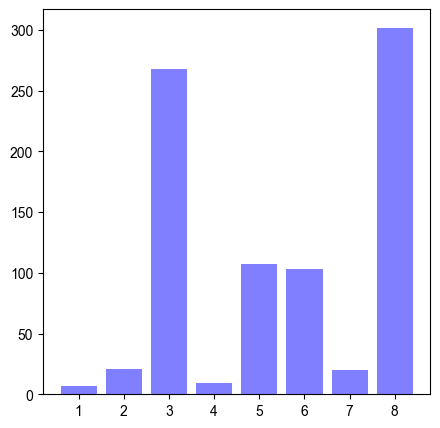

In [218]:
#barplt o fthe clusters
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(range(1,9), [cluster_indices.tolist().count(i) for i in range(1,9)], alpha=0.5, color='blue')


In [90]:
%load_ext watermark
%watermark


Last updated: 2023-12-12T14:31:12.844182+00:00

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.16.1

Compiler    : Clang 13.0.0 (clang-1300.0.29.30)
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit



In [91]:
%watermark --iversions



pandas    : 1.4.4
scipy     : 1.11.3
numpy     : 1.23.4
matplotlib: 3.8.0

